# How to see where Time is spent in Finmag Simulations

**Purpose**: Demonstrate Finmag's built-in timing capabilities for high-level profiling.

**Other topics touched**

**Author and creation date**: Marc-Antonio Bisotti, Dec 2012

**Modifications by**:

## Step 1. Let finmag run

Let's run a sample simulation just to let finmag do some work.

In [1]:
import dolfin as df
import logging
from finmag import Simulation
from finmag.energies import Zeeman, Exchange, UniaxialAnisotropy, Demag

log = logging.getLogger(name='finmag')
log.setLevel(logging.ERROR)

mesh = df.BoxMesh(0, 0, 0, 100, 10, 10, 50, 5, 5)

Ms = 8.6e5
A = 13.0e-12
H = 1.1 * Ms
K1 = 4e3

sim = Simulation(mesh, Ms, unit_length=1)
sim.set_m((1, 0, 0))
sim.add(Exchange(A))
sim.add(Demag())
sim.add(Zeeman((0, 0, H)))
sim.add(UniaxialAnisotropy(K1, (0, 1, 0)))
sim.run_until(1e-9)

print sim.m_average

[2014-06-09 18:12:46] INFO: Finmag logging output will be appended to file: '/home/albert/.finmag/global.log'
[2014-06-09 18:12:46] DEBUG: Building modules in 'native'...
[2014-06-09 18:12:47] DEBUG: FinMag          5043:7f0fe356afeccbff8db1b1e93f0311cd85159c98
[2014-06-09 18:12:47] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-06-09 18:12:47] DEBUG: Numpy           1.8.1                Scipy           0.12.0              
[2014-06-09 18:12:47] DEBUG: IPython         2.1.0                Python          2.7.5+              
[2014-06-09 18:12:47] DEBUG: Paraview        4.0.1-1              Sundials        2.5.0               
[2014-06-09 18:12:47] DEBUG: Boost-Python    <unknown>            Linux           Linux Mint 16 Petra 
[2014-06-09 18:12:47] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.


[  1.56528156e-04   6.17770751e-04   9.93204268e-01]


## Step 2. Have a look at the timings

Finmag will keep track of the runtimes behind the scenes. The information is available in the default_timer object and can be printed using the *report* method. It will show the methods or functions that took the most time to execute. The maximum number of items reported can be set by passing an integer value to the *report* method.

In [2]:
# IPYTHON_TEST_IGNORE_OUTPUT

from aeon import default_timer
print default_timer.report(20)

Timings: Showing the up to 20 slowest items.

+--------------------+------------------------------+--------+------------+--------------+
| class/module       | name                         |  calls |  total (s) | per call (s) |
+--------------------+------------------------------+--------+------------+--------------+
| FKDemag            | compute_field                |    304 |       3.62 |       0.0119 |
| LLG                | sundials_jtimes              |    540 |       1.83 |      0.00339 |
| LLG                | solve                        |    303 |      0.555 |      0.00183 |
| UniaxialAnisotropy | compute_field                |    844 |      0.412 |     0.000488 |
| Exchange           | compute_field                |    844 |      0.383 |     0.000454 |
| FKDemag            | setup                        |      1 |      0.317 |        0.317 |
| UniaxialAnisotropy | setup                        |      1 |      0.172 |        0.172 |
| Exchange           | setup                

## Bonus: Make a Pretty Picture!

The data is best visualised using a pie chart.

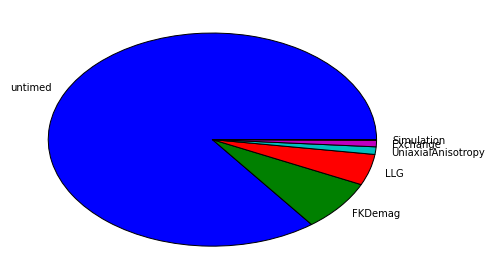

In [4]:
# IPYTHON_TEST_IGNORE_OUTPUT

import matplotlib.pyplot as plt
groups, times, shares = zip(* default_timer.grouped_timings())
_ = plt.pie(shares, labels=groups)

## A word of advice to those using the timings module in interactive mode

The timings code takes a final look on the clock when the *report* method is called. If there is a long delay between the moment you run the simulation and the moment you ask for the report, the relative timings will be meaningless because the delay is added to the total runtime.